## 1차 과제 - 고객 유지/이탈 자유 분석
- 주제: 가입 고객 이탈 데이터를 분석하여 기업에 인사이트 제공
- 데이터: Customer Churn Data(train data가 따로 있으나 너무 커서 test data만 사용, 예측 성능 향상을 원한다면 train data 사용해도 무방)
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv
- 사용 라이브러리: 자유

본 과제는 여러분들의 실력을 확인하고자 출제한 과제로 어떠한 가이드라인도 제공하거나 제약하지 않으며 자유롭게 분석하시면 됩니다.

분석이나 예측 어느 쪽이든 상관없으며 몇가지 조건만 유의하여 주시기 바랍니다.

### 조건
1. 기본적인 분석 과정은 EDA(데이터 탐색) > 전처리 > 분석(예측) 진행 > 결과 해석 으로 진행되지만 약간의 수정 허용
2. EDA 과정에서 최소 2개의 시각화 모형(그래프) 사용
3. 분석 및 예측 시 최소 2개의 모형(모델) 사용
4. 전처리는 자유롭게 진행하며 추가적인 데이터 사용이 필요하다면 허용

# 데이터 불러오기 

In [1]:
# 앞 10개의 데이터 출력
import pandas as pd
df = pd.read_csv('../과제/customer_churn_dataset-testing-master.csv')
df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0


In [2]:
# 데이터 정보 요약 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


## col 
ID \
나이 \
성별 \
서비스 이용 기간(개월 수)\
이용 빈도\
지원 센터 전화 수 \
결제 지연 횟수 \
구독 유형 \
구독 기간\
지출 총 금액\
마지막 접속 \
이탈 여부

In [3]:
# 기술통계량 확인
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


Total Spend의 std(표준편차값이 매우 크다)
-> 스케일링 필요 
#### 스케일링 
##### 표준화 (Standardization)
표준화는 각 값을 평균 0, 표준편차 1로 변환하는 방법
- 중심화: 평균이 0, 표준편차가 1이 된다.
장점: /
- 분포에 둔감
- 표준화는 데이터의 분포에 영향을 받지 않음, 이상치(outliers)나 데이터의 분포가 비정규적인 경우에도 효과적입니다.
- 여러 변수와의 비교 용이 
- 대부분의 모델과 호환: 선형 회귀, 로지스틱 회귀, SVM, K-최근접 이웃(KNN) 등 대부분의 머신러닝 알고리즘에서 잘 작동

##### 정규화 (Normalization)
정규화는 데이터를 0과 1 사이로 변환하는 방법
- 범위 축소: 모든 값이 0과 1 사이로 변환
장점:/
- 값이 제한된 범위 내에 있음 -> 값이 범위가 중요한 모델에 유리 
- 값의 분포가 비정규적일 때 사용


In [4]:
# 표준화 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Total Spend'] = scaler.fit_transform(df[['Total Spend']])

In [5]:
df['Total Spend'].describe()

count    6.437400e+04
mean    -4.944902e-17
std      1.000008e+00
min     -1.690569e+00
25%     -8.740788e-01
50%     -2.692262e-02
75%      8.700663e-01
max      1.759389e+00
Name: Total Spend, dtype: float64

평균이 약 0, 표준편차가 1로 표준화가 잘 되었음을 확인 ^^ 

# EDA & 전처리

In [6]:
# 결측값 확인
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [7]:
df.drop('CustomerID',axis=1,inplace=True)

<Axes: >

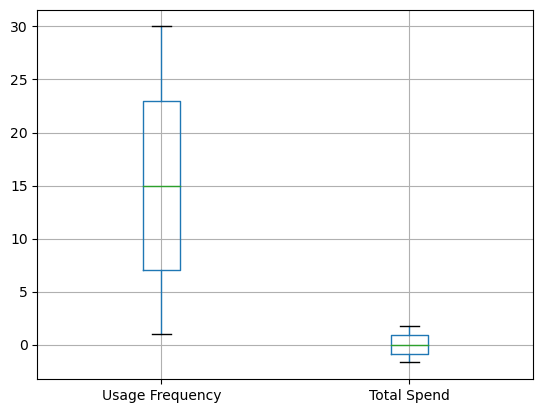

In [8]:
# 이상치 확인
df.boxplot(column=['Usage Frequency','Total Spend'])

In [9]:
# 문자형 변수 변경 - 성별 변수 
df['Gender'] = df['Gender'].replace({'Male':0,"Female":1})
df['Gender'].head()

0    1
1    1
2    0
3    0
4    1
Name: Gender, dtype: int64

In [10]:
# Subscription Type, Contract Length 더미변수 생성
df['Subscription Type'].value_counts()

Subscription Type
Standard    21502
Basic       21451
Premium     21421
Name: count, dtype: int64

In [11]:
df['Contract Length'].value_counts()

Contract Length
Monthly      22130
Annual       21410
Quarterly    20834
Name: count, dtype: int64

In [12]:
subscription_dummies = pd.get_dummies(df['Subscription Type'], prefix='SubType')
Contract_dummies = pd.get_dummies(df['Contract Length'], prefix='Contract len')

In [13]:
# 생성된 더미 변수 병합, 원래 변수 삭제 
df = pd.concat([df, subscription_dummies, Contract_dummies], axis=1)
df.drop(['Subscription Type', 'Contract Length'],inplace=True, axis=1)
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,SubType_Basic,SubType_Premium,SubType_Standard,Contract len_Annual,Contract len_Monthly,Contract len_Quarterly
0,22,1,25,14,4,27,0.218408,9,1,True,False,False,False,True,False
1,41,1,28,28,7,13,0.164742,20,0,False,False,True,False,True,False
2,47,0,27,10,2,29,0.827900,21,0,False,True,False,True,False,False
3,35,0,9,12,5,17,-1.184575,18,0,False,True,False,False,False,True
4,53,1,58,24,9,2,-0.030756,18,0,False,False,True,True,False,False


In [14]:
# dummy variable 중 하나 삭제
df.drop(columns=['SubType_Basic','Contract len_Quarterly'],inplace=True)
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,SubType_Premium,SubType_Standard,Contract len_Annual,Contract len_Monthly
0,22,1,25,14,4,27,0.218408,9,1,False,False,False,True
1,41,1,28,28,7,13,0.164742,20,0,False,True,False,True
2,47,0,27,10,2,29,0.827900,21,0,True,False,True,False
3,35,0,9,12,5,17,-1.184575,18,0,True,False,False,False
4,53,1,58,24,9,2,-0.030756,18,0,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,45,1,33,12,6,21,1.556225,14,1,False,False,False,False
64370,37,0,6,1,5,22,1.464226,9,1,False,True,True,False
64371,25,0,39,14,8,30,-0.820413,20,1,True,False,False,True
64372,50,1,18,19,7,22,-0.003923,13,1,False,True,False,True


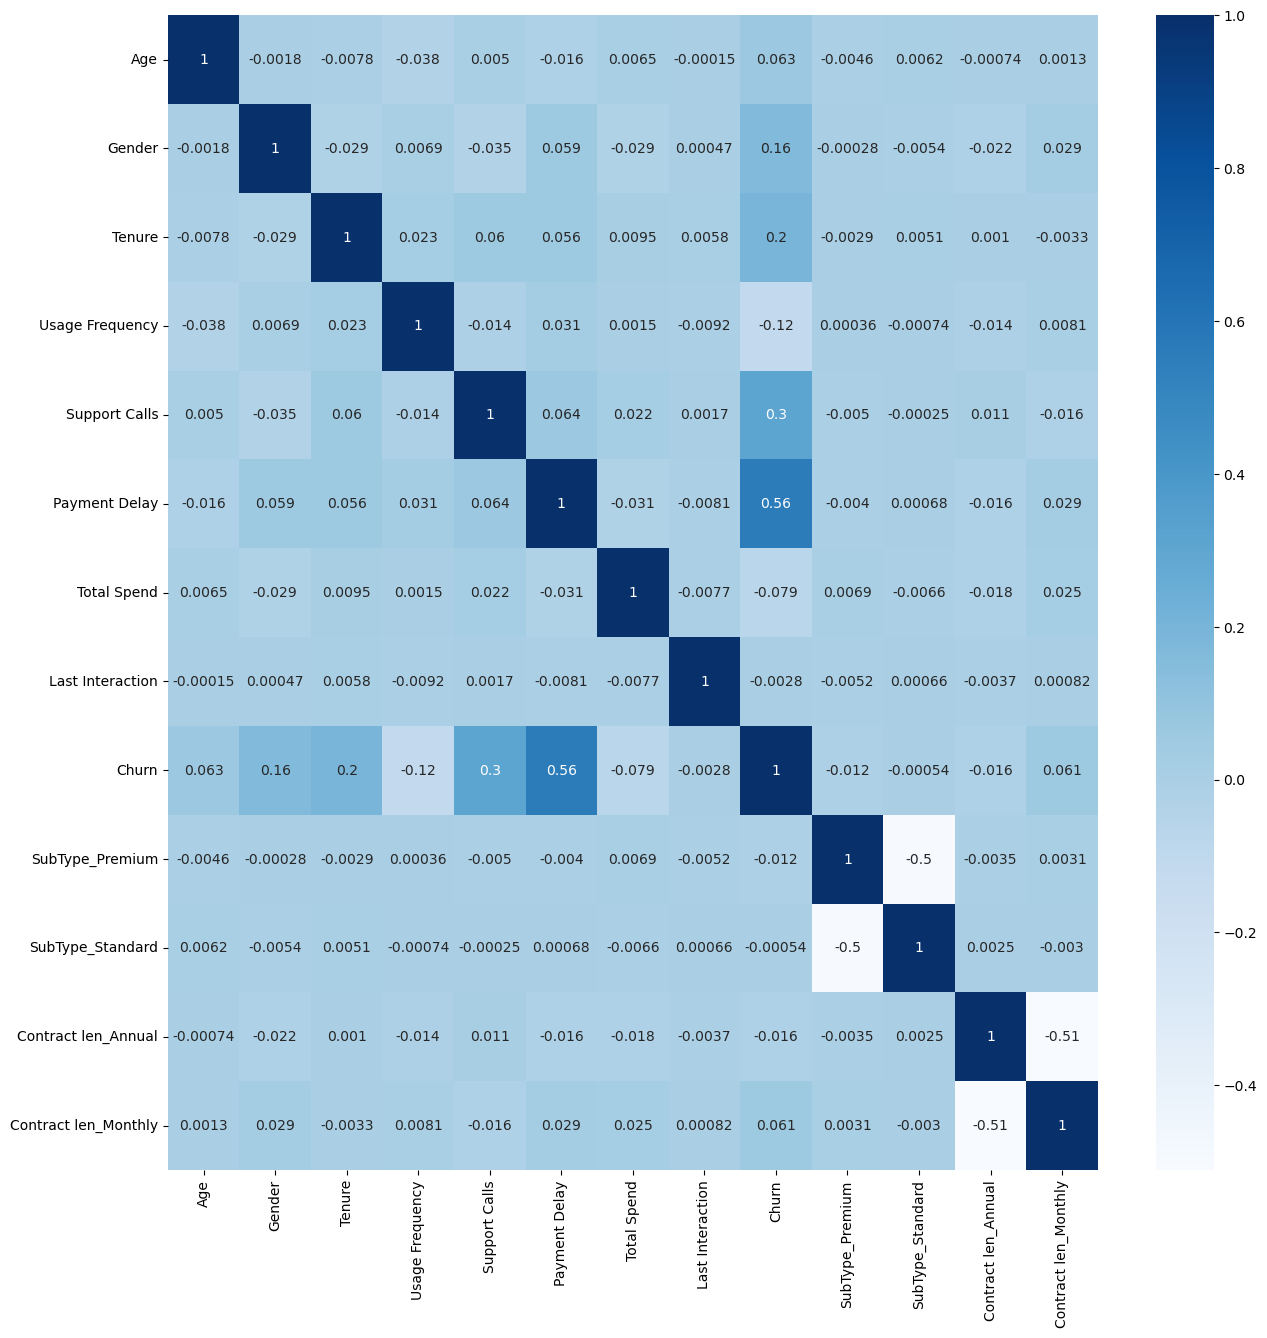

In [15]:
# 상관관계 시각화 
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr,cmap='Blues',annot=True)
plt.show()

## 로지스틱 회귀

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   64374 non-null  int64  
 1   Gender                64374 non-null  int64  
 2   Tenure                64374 non-null  int64  
 3   Usage Frequency       64374 non-null  int64  
 4   Support Calls         64374 non-null  int64  
 5   Payment Delay         64374 non-null  int64  
 6   Total Spend           64374 non-null  float64
 7   Last Interaction      64374 non-null  int64  
 8   Churn                 64374 non-null  int64  
 9   SubType_Premium       64374 non-null  bool   
 10  SubType_Standard      64374 non-null  bool   
 11  Contract len_Annual   64374 non-null  bool   
 12  Contract len_Monthly  64374 non-null  bool   
dtypes: bool(4), float64(1), int64(8)
memory usage: 4.7 MB


In [20]:
# bool 형식을 int로 변환
df['SubType_Premium'] = df['SubType_Premium'].astype(int)
df['SubType_Standard'] = df['SubType_Standard'].astype(int)
df['Contract len_Annual'] = df['Contract len_Annual'].astype(int)
df['Contract len_Monthly'] = df['Contract len_Monthly'].astype(int)

In [21]:
import statsmodels.api as sm

X = df.drop('Churn', axis=1)
y = df['Churn']

X = sm.add_constant(X)

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.392871
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                64374
Model:                          Logit   Df Residuals:                    64361
Method:                           MLE   Df Model:                           12
Date:                Tue, 10 Sep 2024   Pseudo R-squ.:                  0.4321
Time:                        21:07:52   Log-Likelihood:                -25291.
converged:                       True   LL-Null:                       -44531.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.5962      0.079    -95.892      0.000      -7.751      -7.441

- R-square : 모델이 전체 변동성의 약 43.21% 설명
- 유의한 변수: Age, Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Total Spend, SubType_Premium, SubType_Standard, Contract len_Annual, Contract len_Monthly
- 유의하지 않은 변수: Last Interaction (p-value = 0.452) 

=> 나이, 성별, 서비스 기간, 지원 호출, 지불 지연, 총 지출, 구독 유형, 계약 길이 등이 고객 이탈에 영향

### 랜덤포레스트

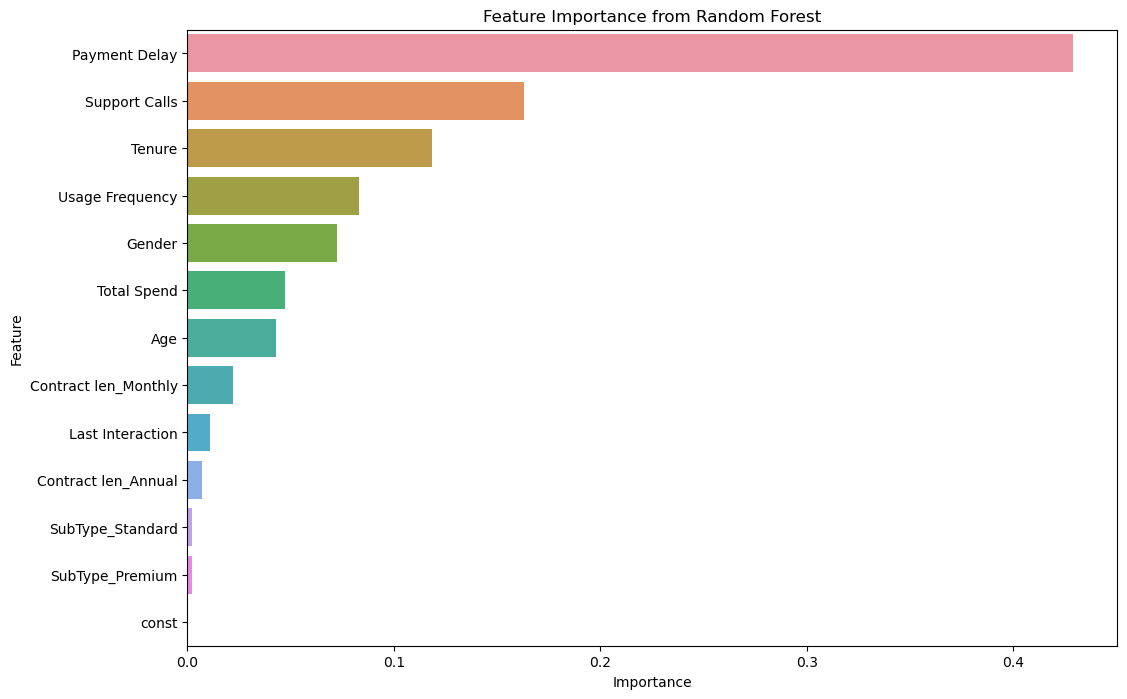

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 영향을 미치는 것을 순서대로 시각화
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


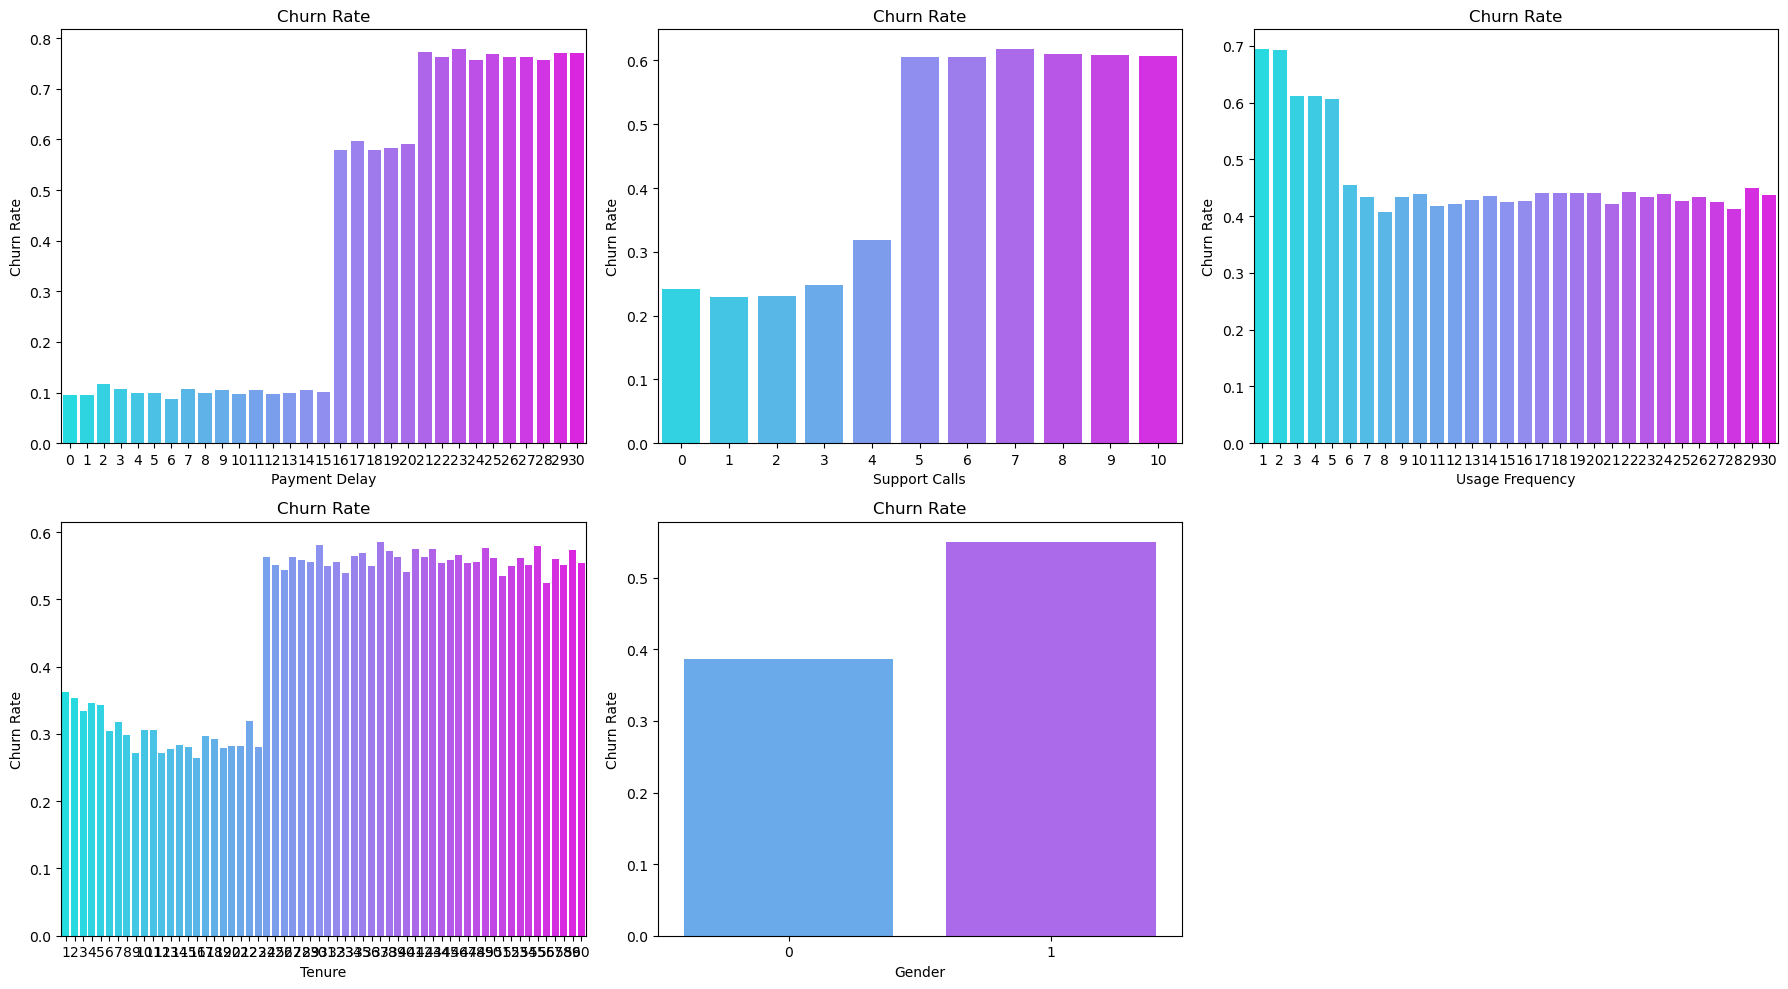

In [40]:
# 위 5개 항목에 대한 이탈률 시각화
features = ['Payment Delay', 'Support Calls', 'Usage Frequency', 'Tenure', 'Gender']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# 각 특성별 이탈률 시각화
for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    
    churn_by_feature = df.groupby(feature)[target].mean().reset_index()
    churn_by_feature.columns = [feature, 'Churn Rate']
    
    sns.barplot(x=feature, y='Churn Rate', data=churn_by_feature, ax=axes[row, col],palette='cool')
    axes[row, col].set_title(f'Churn Rate')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Churn Rate')

# 마지막 빈 서브플롯 제거
fig.delaxes(axes[1, 2])

# 레이아웃 조정
plt.tight_layout()
plt.show()

예상과 비슷하게 결제 지연 횟수가 많을 수록 지원 센터에 전화한 수가 많을 수록, 사용 빈도가 적을 수록 이탈 많음 \
여성의 이탈 비율이 더 높음 

## 성별에 따른 로지스틱 회귀

In [41]:
import pandas as pd
import statsmodels.api as sm

# 성별별로 데이터 나누기
df_male = df[df['Gender'] == 0]
df_female = df[df['Gender'] == 1]

# 성별별 로지스틱 회귀 분석
def logistic_regression_analysis(data, features):
    X = data[features]
    y = data['Churn']
    X = sm.add_constant(X)
    model = sm.Logit(y, X)
    result = model.fit()
    return result

features = ['Age', 'Payment Delay', 'Support Calls', 'Usage Frequency', 'Tenure', 'Total Spend']

result_male = logistic_regression_analysis(df_male, features)
result_female = logistic_regression_analysis(df_female, features)

# 결과 출력
print("Male:")
print(result_male.summary())
print("\nFemale:")
print(result_female.summary())


Optimization terminated successfully.
         Current function value: 0.378480
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355290
         Iterations 7
Male:
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                30021
Model:                          Logit   Df Residuals:                    30014
Method:                           MLE   Df Model:                            6
Date:                Tue, 10 Sep 2024   Pseudo R-squ.:                  0.4324
Time:                        21:36:40   Log-Likelihood:                -11362.
converged:                       True   LL-Null:                       -20019.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

공통점:
- 나이가 증가할수록 이탈 확률이 증가
- 결제 지연이 증가할수록 이탈 확률이 증가
- Support Calls: 지원 센터 전화가 증가할수록 이탈 확률이 증가
- Usage Frequency: 이용 빈도가 증가할수록 이탈 확률이 감소
- Tenure: 서비스 이용 기간이 증가할수록 이탈 확률이 증가

차이점:
- Total Spend: 남성 그룹에서는 통계적으로 유의하지 않지만, 여성 그룹에서는 이탈 확률이 감소.


## 나이에 따른 로지스틱 회귀

In [42]:
# 나이 그룹화
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])

age_groups = df['Age Group'].unique()
age_group_results = {}

for age_group in age_groups:
    group_data = df[df['Age Group'] == age_group]
    result = logistic_regression_analysis(group_data, features)
    age_group_results[age_group] = result

# 결과 출력
for age_group, result in age_group_results.items():
    print(f"\nAge Group: {age_group}")
    print(result.summary())

Optimization terminated successfully.
         Current function value: 0.383375
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.375058
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.376588
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.434303
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.432888
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.366354
         Iterations 7

Age Group: 21-30
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                12930
Model:                          Logit   Df Residuals:                    12923
Method:                           MLE   Df Model:                            6
Date:                Tue, 10 Sep 2024   Pseudo R-squ.:

공통적인 요인:

- Payment Delay: 결제 지연이 이탈 확률을 증가
- Support Calls: 지원 센터 전화가 이탈 확률을 증가
- Usage Frequency: 이용 빈도가 이탈 확률을 감소
- Tenure: 서비스 이용 기간이 이탈 확률을 증가
- Total Spend: 총 지출이 이탈 확률을 감소

차이점:
- Total Spend: 나이 그룹에 따라 총 지출의 영향력이 다름

### 주요 변수 시각화

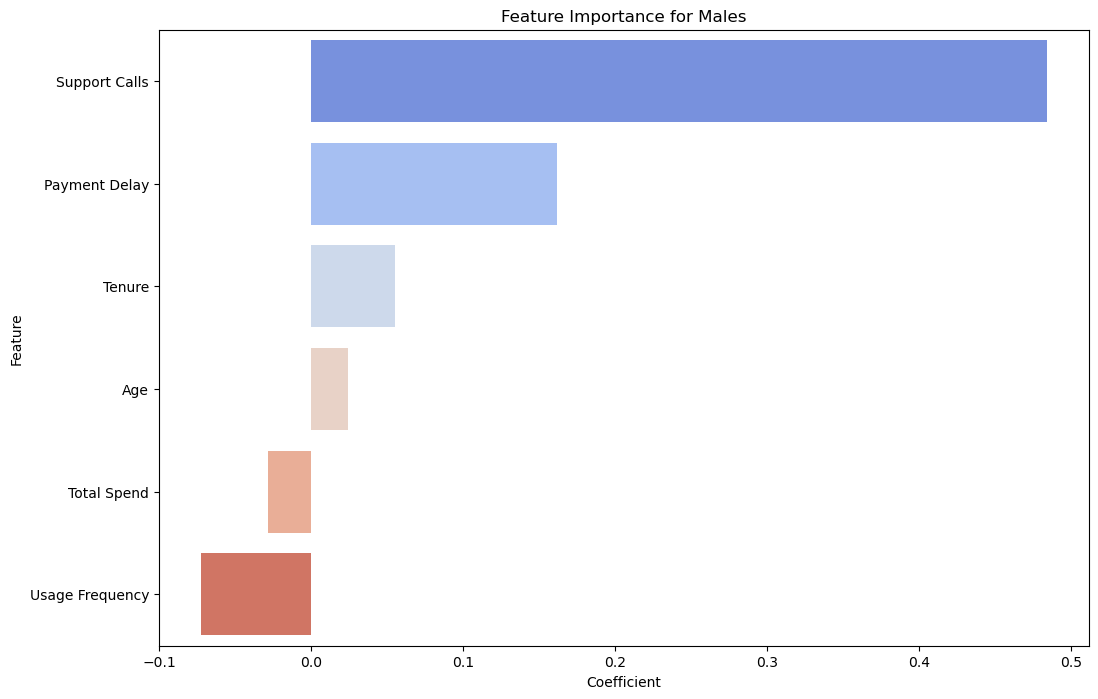

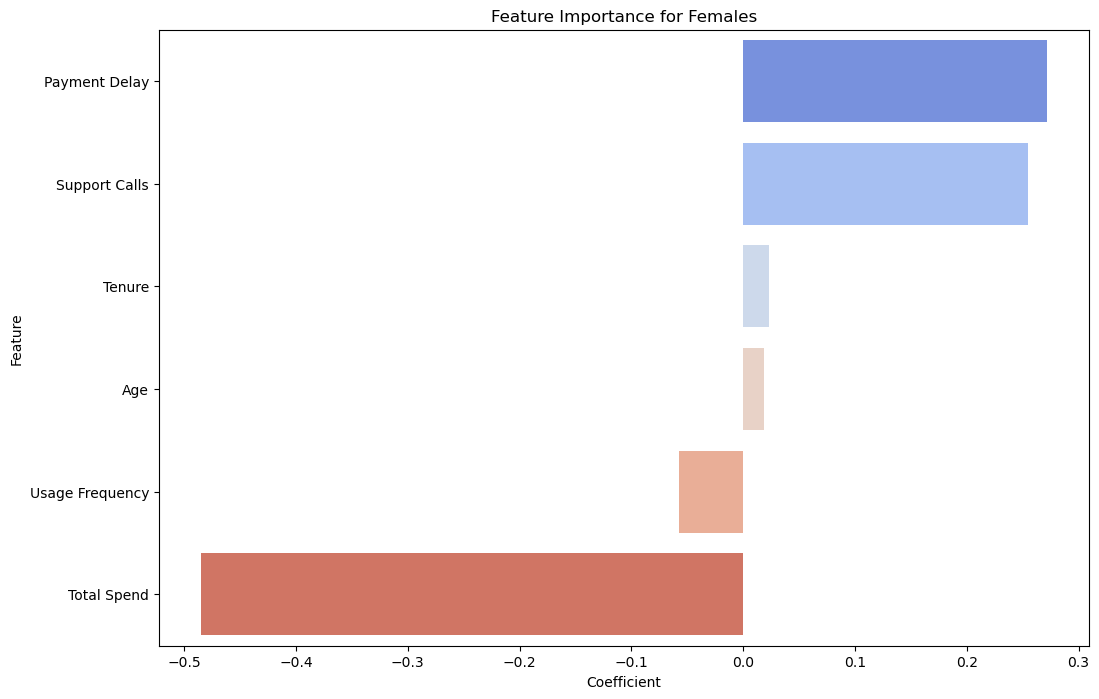

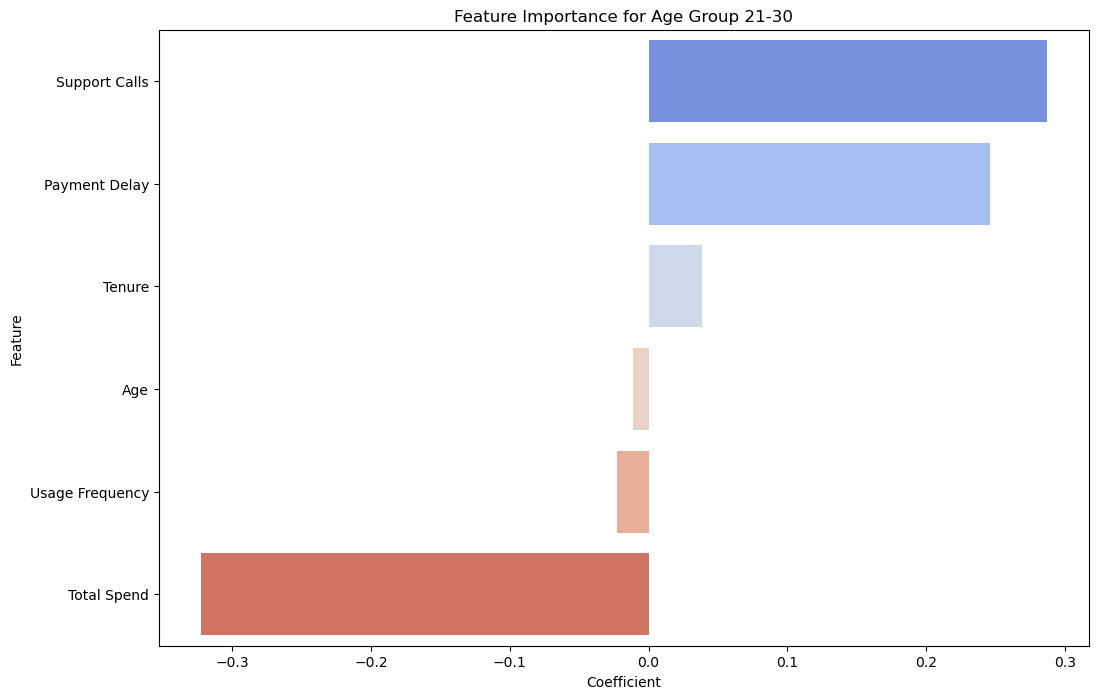

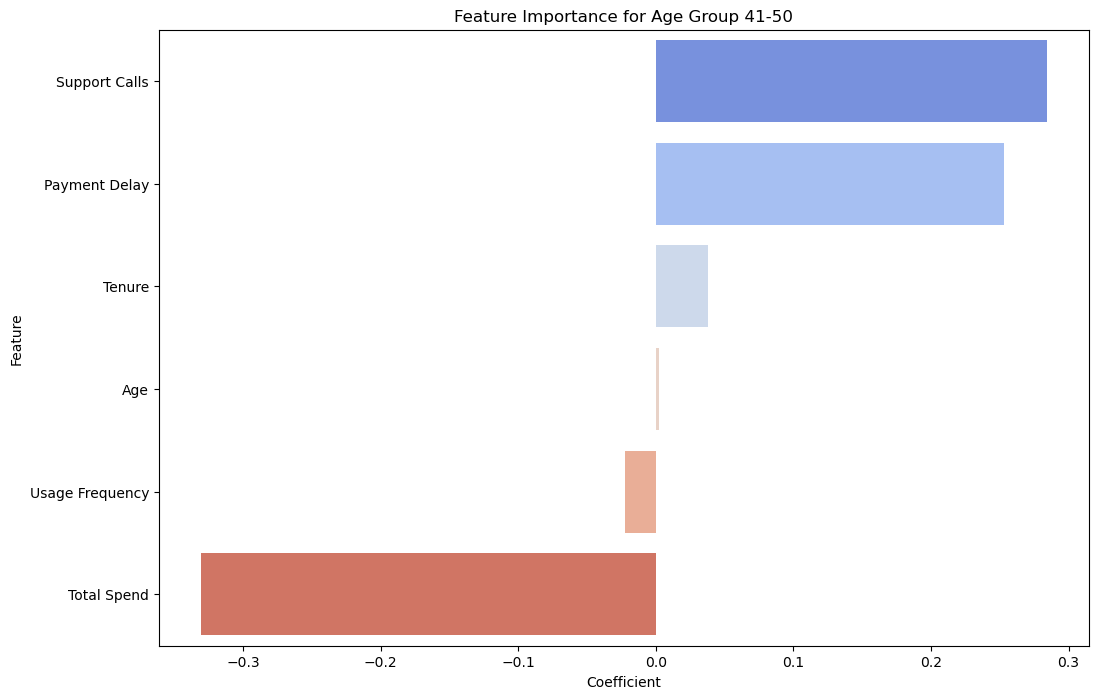

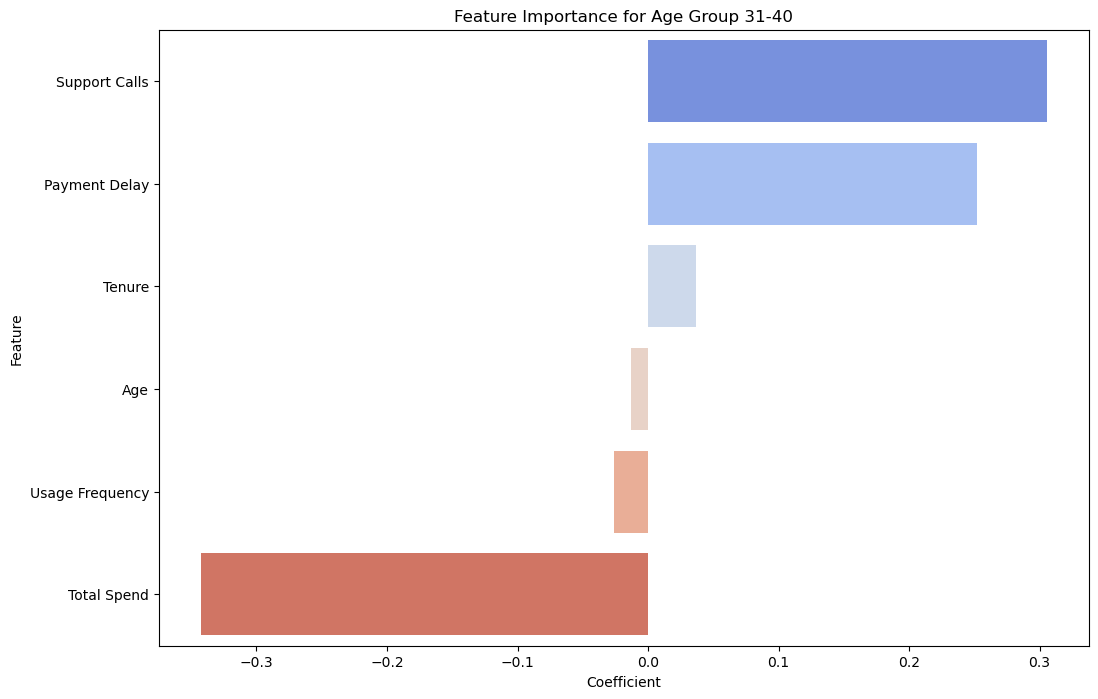

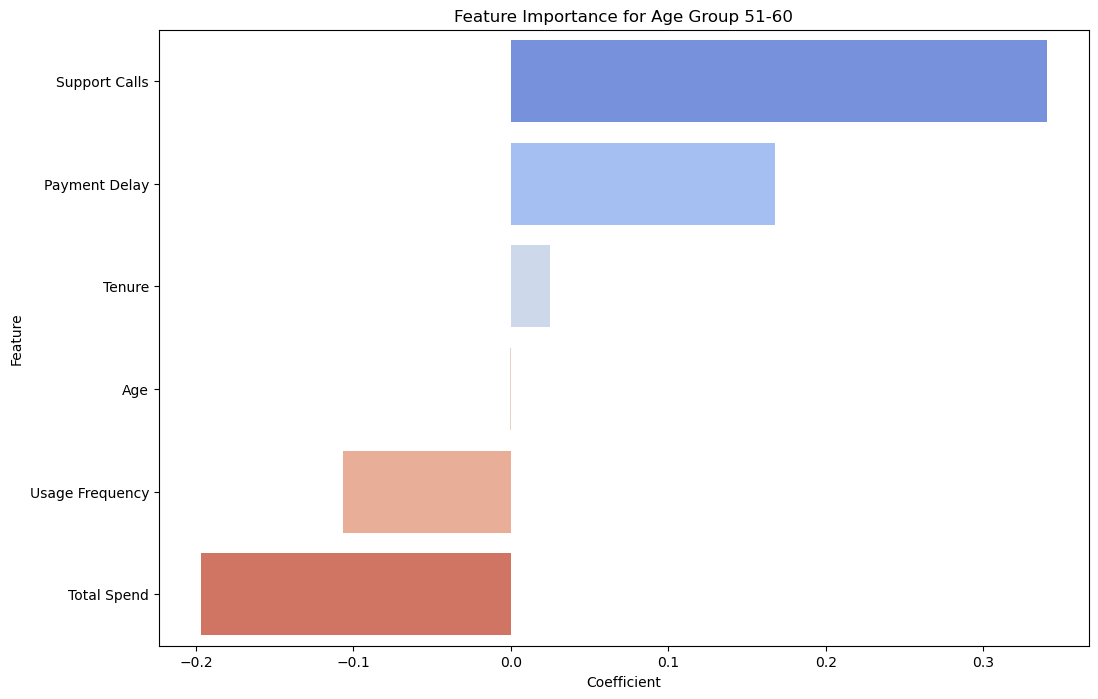

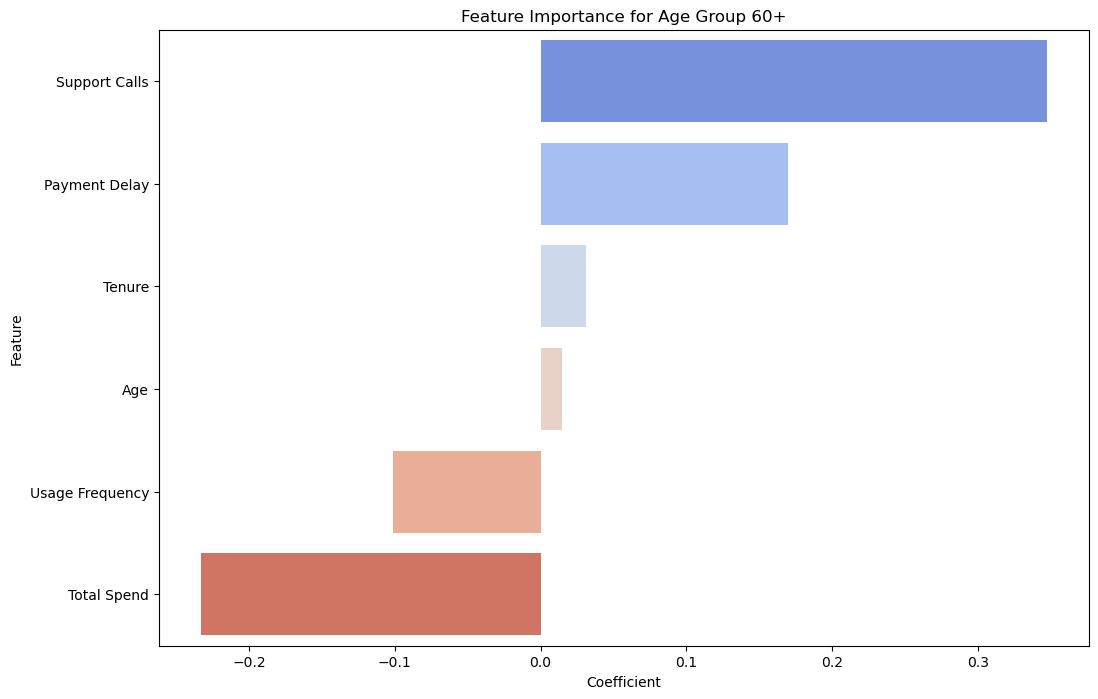

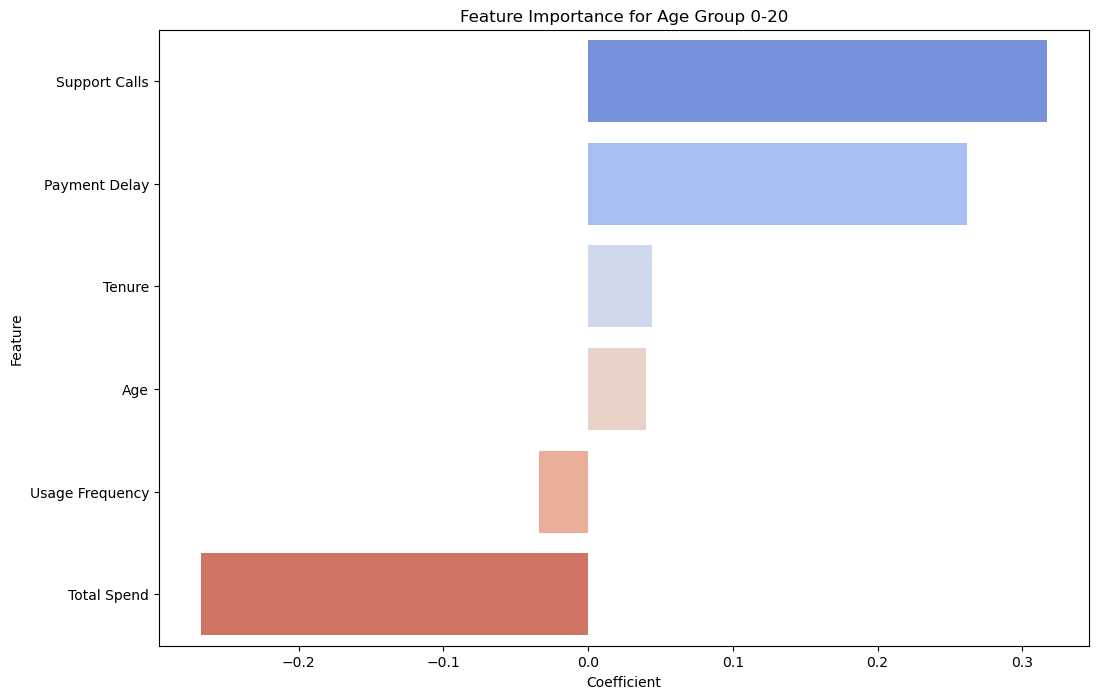

In [43]:
def plot_feature_importance(result, title):
    #중요 변수 추출
    importance_df = pd.DataFrame({
        'Feature': result.params.index,
        'Coefficient': result.params.values
    })
    importance_df = importance_df[importance_df['Feature'] != 'const']
    importance_df = importance_df.sort_values(by='Coefficient', ascending=False)
    
    #중요도 시각화
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette='coolwarm')
    plt.title(title)
    plt.xlabel('Coefficient')
    plt.ylabel('Feature')
    plt.show()

# 성별별 중요 변수 시각화
plot_feature_importance(result_male, 'Feature Importance for Males')
plot_feature_importance(result_female, 'Feature Importance for Females')

# 나이 그룹별 중요 변수 시각화
for age_group, result in age_group_results.items():
    plot_feature_importance(result, f'Feature Importance for Age Group {age_group}')
